In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('finance_movies.csv')
df = (df.loc[:, ['movie', 'script']])
df

movie                                             script
0               Margin Call  Is that them? Jesus Christ. Are they going to ...
1               Wall Street  Easy! Excuse me! Good morning. Jackson Steinem...
2             The Big Short  Frank. How are the wife and kids? You know, fo...
3            Trading Places  Your breakfast, sir. Pork bellies! I have a hu...
4   The Wolf of Wall Street  The world of investing can be a jungle. Bulls....
5           American Psycho  rare roasted partridge breast in raspberry cou...
6                 Arbitrage  But you took a huge bet on the housing crisis ...
7                    Equity  The entire market is watching? Back with Dynac...
8                Inside Job  Iceland is a stable democracy with a high stan...
9               Boiler Room  I read this article a while back that said Mic...
10             Rogue Trader  ..denied reports the British banking system is...
11       The Wizard of Lies  HI removed, cleaned and corrected by Tronar My...
12     Other Peoples’ Money  I love money. I love money more Than i love th...

In [3]:
df = (df
 .set_index('movie')
 .rename_axis(None, axis=0)
)

In [4]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [5]:
# Let's take a look at the updated text
df_clean = pd.DataFrame(df.script.apply(round1))
df_clean

script
Margin Call              is that them jesus christ are they going to do...
Wall Street              easy excuse me good morning jackson steinem ho...
The Big Short            frank how are the wife and kids you know for y...
Trading Places           your breakfast sir pork bellies i have a hunch...
The Wolf of Wall Street  the world of investing can be a jungle bulls b...
American Psycho          rare roasted partridge breast in raspberry cou...
Arbitrage                but you took a huge bet on the housing crisis ...
Equity                   the entire market is watching back with dynaco...
Inside Job               iceland is a stable democracy with a high stan...
Boiler Room              i read this article a while back that said mic...
Rogue Trader             denied reports the british banking system is a...
The Wizard of Lies       hi removed cleaned and corrected by tronar my ...
Other Peoples’ Money     i love money i love money more than i love the...

In [6]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [7]:
# Let's take a look at the updated text
df_clean = pd.DataFrame(df_clean.script.apply(round2))
df_clean

script
Margin Call              is that them jesus christ are they going to do...
Wall Street              easy excuse me good morning jackson steinem ho...
The Big Short            frank how are the wife and kids you know for y...
Trading Places           your breakfast sir pork bellies i have a hunch...
The Wolf of Wall Street  the world of investing can be a jungle bulls b...
American Psycho          rare roasted partridge breast in raspberry cou...
Arbitrage                but you took a huge bet on the housing crisis ...
Equity                   the entire market is watching back with dynaco...
Inside Job               iceland is a stable democracy with a high stan...
Boiler Room              i read this article a while back that said mic...
Rogue Trader             denied reports the british banking system is a...
The Wizard of Lies       hi removed cleaned and corrected by tronar my ...
Other Peoples’ Money     i love money i love money more than i love the...

In [8]:
#Pickle for later
# df_clean.to_pickle('corpus.pkl')

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
df_cv = cv.fit_transform(df_clean.script)
df_dtm = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names_out())
df_dtm.index = df_clean.index
df_dtm

aa  aaa  aaah  aaarated  aagghh  aagh  aah  aas  \
Margin Call               0    0     0         0       0     0    0    0   
Wall Street               0    0     0         0       0     0    0    0   
The Big Short             8    7     0         4       0     0    0    4   
Trading Places            0    0     0         0       0     0    0    0   
The Wolf of Wall Street   0    0     0         0       0     0    0    0   
American Psycho           0    0     1         0       0     0    0    0   
Arbitrage                 0    0     0         0       0     0    0    0   
Equity                    0    0     0         0       0     0    0    0   
Inside Job                0    0     0         0       0     0    0    0   
Boiler Room               0    0     0         0       0     0    0    0   
Rogue Trader              0    0     0         0       3     1    0    0   
The Wizard of Lies        0    0     0         0       0     0    0    0   
Other Peoples’ Money      0    0     0         0       0     0    1    0   

                         abandon  abbott  ...  zealand  zero  zerosum  zip  \
Margin Call                    0       0  ...        0     0        0    0   
Wall Street                    0       0  ...        0     1        1    0   
The Big Short                  0       0  ...        0    13        0    0   
Trading Places                 0       0  ...        0     0        0    0   
The Wolf of Wall Street        0       0  ...        1     1        0    1   
American Psycho                0       0  ...        0     0        0    0   
Arbitrage                      0       0  ...        0     0        0    0   
Equity                         0       1  ...        0     0        0    0   
Inside Job                     0       0  ...        0     0        0    0   
Boiler Room                    0       0  ...        0     2        0    0   
Rogue Trader                   0       0  ...        0     1        0    0   
The Wizard of Lies             2       0  ...        0     1        0    0   
Other Peoples’ Money           0       0  ...        0     0        0    0   

                         zipcode  ziplocked  zoloft  zone  zoo  zs  
Margin Call                    0          0       0     0    0   0  
Wall Street                    1          1       0     1    1   1  
The Big Short                  0          0       2     0    0   0  
Trading Places                 0          0       0     0    1   0  
The Wolf of Wall Street        0          0       0     2    0   0  
American Psycho                0          0       0     0    0   0  
Arbitrage                      0          0       0     0    0   0  
Equity                         0          0       0     0    0   0  
Inside Job                     0          0       0     0    0   0  
Boiler Room                    0          0       0     1    0   0  
Rogue Trader                   0          0       0     0    0   0  
The Wizard of Lies             0          0       0     0    0   0  
Other Peoples’ Money           0          0       0     0    0   0  

[13 rows x 10128 columns]

In [10]:
# Pickle for later
# df_dtm.to_pickle('dtm.pkl')

In [11]:
# Also pickle cleaned data
import pickle

# df_clean.to_pickle('df_clean.pkl')
# pickle.dump(cv, open('cv.pkl', 'wb'))

# Next Stage

In [12]:
dd = pd.read_pickle('dtm.pkl').T
dd

Margin Call  Wall Street  The Big Short  Trading Places  \
aa                   0            0              8               0   
aaa                  0            0              7               0   
aaah                 0            0              0               0   
aaarated             0            0              4               0   
aagghh               0            0              0               0   
...                ...          ...            ...             ...   
ziplocked            0            1              0               0   
zoloft               0            0              2               0   
zone                 0            1              0               0   
zoo                  0            1              0               1   
zs                   0            1              0               0   

           The Wolf of Wall Street  American Psycho  Arbitrage  Equity  \
aa                               0                0          0       0   
aaa                              0                0          0       0   
aaah                             0                1          0       0   
aaarated                         0                0          0       0   
aagghh                           0                0          0       0   
...                            ...              ...        ...     ...   
ziplocked                        0                0          0       0   
zoloft                           0                0          0       0   
zone                             2                0          0       0   
zoo                              0                0          0       0   
zs                               0                0          0       0   

           Inside Job  Boiler Room  Rogue Trader  The Wizard of Lies  \
aa                  0            0             0                   0   
aaa                 0            0             0                   0   
aaah                0            0             0                   0   
aaarated            0            0             0                   0   
aagghh              0            0             3                   0   
...               ...          ...           ...                 ...   
ziplocked           0            0             0                   0   
zoloft              0            0             0                   0   
zone                0            1             0                   0   
zoo                 0            0             0                   0   
zs                  0            0             0                   0   

           Other Peoples’ Money  
aa                            0  
aaa                           0  
aaah                          0  
aaarated                      0  
aagghh                        0  
...                         ...  
ziplocked                     0  
zoloft                        0  
zone                          0  
zoo                           0  
zs                            0  

[10128 rows x 13 columns]

In [13]:
# Find the top 30 words said in each movie
top_dict = {}
for c in dd.columns:
    top = dd[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Margin Call': [('know', 75),
  ('right', 70),
  ('im', 69),
  ('dont', 60),
  ('going', 55),
  ('just', 48),
  ('fuck', 43),
  ('yeah', 41),
  ('youre', 38),
  ('thats', 37),
  ('come', 37),
  ('sam', 36),
  ('eric', 34),
  ('think', 34),
  ('like', 30),
  ('fucking', 27),
  ('today', 26),
  ('need', 26),
  ('want', 24),
  ('yes', 24),
  ('good', 23),
  ('really', 23),
  ('people', 22),
  ('mr', 21),
  ('look', 21),
  ('okay', 21),
  ('did', 20),
  ('hes', 20),
  ('guys', 20),
  ('whats', 20)],
 'Wall Street': [('got', 90),
  ('lm', 77),
  ('dont', 73),
  ('know', 69),
  ('mr', 60),
  ('youre', 58),
  ('right', 55),
  ('lts', 55),
  ('like', 50),
  ('gekko', 50),
  ('bud', 46),
  ('lll', 43),
  ('gordon', 41),
  ('money', 38),
  ('just', 37),
  ('gonna', 37),
  ('good', 37),
  ('hes', 36),
  ('buddy', 36),
  ('bluestar', 33),
  ('thats', 33),
  ('buy', 33),
  ('lf', 32),
  ('come', 32),
  ('make', 31),
  ('want', 30),
  ('look', 30),
  ('yeah', 29),
  ('think', 29),
  ('sure', 27)],


In [14]:
# Print the top 15 words for each movie
for movie, top_words in top_dict.items():
    print(movie)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Margin Call
know, right, im, dont, going, just, fuck, yeah, youre, thats, come, sam, eric, think
---
Wall Street
got, lm, dont, know, mr, youre, right, lts, like, gekko, bud, lll, gordon, money
---
The Big Short
know, im, right, just, yeah, dont, okay, thats, like, theyre, want, bonds, youre, mortgage
---
Trading Places
im, right, dont, winthorpe, like, louis, mr, good, man, going, sir, youre, think, just
---
The Wolf of Wall Street
fucking, know, right, yeah, im, dont, like, fuck, got, youre, jordan, just, gonna, oh
---
American Psycho
im, dont, patrick, know, just, youre, think, really, oh, paul, like, uh, want, listen
---
Arbitrage
im, know, yeah, just, right, going, dont, youre, want, did, fucking, got, okay, thats
---
Equity
yeah, know, im, dont, like, just, okay, gonna, got, naomi, did, want, right, thats
---
Inside Job
financial, banks, think, money, know, investment, people, dont, billion, did, goldman, million, said, crisis
---
Boiler Room
im, know, dont, just, right, gonna, y

In [15]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Pull out the top 30 words in each movie
words = []
for movie in dd.columns:
    top = [word for (word, count) in top_dict[movie]]
    for t in top:
        words.append(t)
        
words

['know',
 'right',
 'im',
 'dont',
 'going',
 'just',
 'fuck',
 'yeah',
 'youre',
 'thats',
 'come',
 'sam',
 'eric',
 'think',
 'like',
 'fucking',
 'today',
 'need',
 'want',
 'yes',
 'good',
 'really',
 'people',
 'mr',
 'look',
 'okay',
 'did',
 'hes',
 'guys',
 'whats',
 'got',
 'lm',
 'dont',
 'know',
 'mr',
 'youre',
 'right',
 'lts',
 'like',
 'gekko',
 'bud',
 'lll',
 'gordon',
 'money',
 'just',
 'gonna',
 'good',
 'hes',
 'buddy',
 'bluestar',
 'thats',
 'buy',
 'lf',
 'come',
 'make',
 'want',
 'look',
 'yeah',
 'think',
 'sure',
 'know',
 'im',
 'right',
 'just',
 'yeah',
 'dont',
 'okay',
 'thats',
 'like',
 'theyre',
 'want',
 'bonds',
 'youre',
 'mortgage',
 'people',
 'fucking',
 'mark',
 'say',
 'think',
 'gonna',
 'money',
 'million',
 'got',
 'make',
 'did',
 'good',
 'yes',
 'shit',
 'swaps',
 'going',
 'im',
 'right',
 'dont',
 'winthorpe',
 'like',
 'louis',
 'mr',
 'good',
 'man',
 'going',
 'sir',
 'youre',
 'think',
 'just',
 'want',
 'duke',
 'thats',
 'morni

In [16]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

#E.g all 13 movies have 'know' as one of the top words.

[('know', 13),
 ('dont', 13),
 ('thats', 13),
 ('right', 12),
 ('just', 12),
 ('think', 12),
 ('like', 12),
 ('yeah', 11),
 ('youre', 11),
 ('want', 11),
 ('good', 11),
 ('im', 10),
 ('come', 10),
 ('got', 10),
 ('money', 10),
 ('okay', 8),
 ('did', 8),
 ('fucking', 7),
 ('look', 7),
 ('gonna', 7),
 ('oh', 7),
 ('hes', 6),
 ('going', 5),
 ('fuck', 5),
 ('mr', 5),
 ('make', 5),
 ('need', 4),
 ('yes', 4),
 ('people', 4),
 ('whats', 4),
 ('million', 4),
 ('hey', 4),
 ('buy', 3),
 ('time', 3),
 ('uh', 3),
 ('tell', 3),
 ('didnt', 3),
 ('really', 2),
 ('guys', 2),
 ('lm', 2),
 ('lts', 2),
 ('lf', 2),
 ('mark', 2),
 ('shit', 2),
 ('morning', 2),
 ('mean', 2),
 ('little', 2),
 ('thank', 2),
 ('talk', 2),
 ('fuckin', 2),
 ('sam', 1),
 ('eric', 1),
 ('today', 1),
 ('gekko', 1),
 ('bud', 1),
 ('lll', 1),
 ('gordon', 1),
 ('buddy', 1),
 ('bluestar', 1),
 ('sure', 1),
 ('theyre', 1),
 ('bonds', 1),
 ('mortgage', 1),
 ('say', 1),
 ('swaps', 1),
 ('winthorpe', 1),
 ('louis', 1),
 ('man', 1),
 ('sir'

In [17]:
# If more than half of movies have it as a top word, exclude it from the list.
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['know',
 'dont',
 'thats',
 'right',
 'just',
 'think',
 'like',
 'yeah',
 'youre',
 'want',
 'good',
 'im',
 'come',
 'got',
 'money',
 'okay',
 'did',
 'fucking',
 'look',
 'gonna',
 'oh']

In [18]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('df_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [19]:
# Recreate document-term matrix
cv = CountVectorizer(stop_words=list(stop_words))
data_cv = cv.fit_transform(data_clean.script)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

In [20]:
# Pickle it for later use
import pickle
# pickle.dump(cv, open("cv_stop.pkl", "wb"))
# data_stop.to_pickle("dtm_stop.pkl")

In [21]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

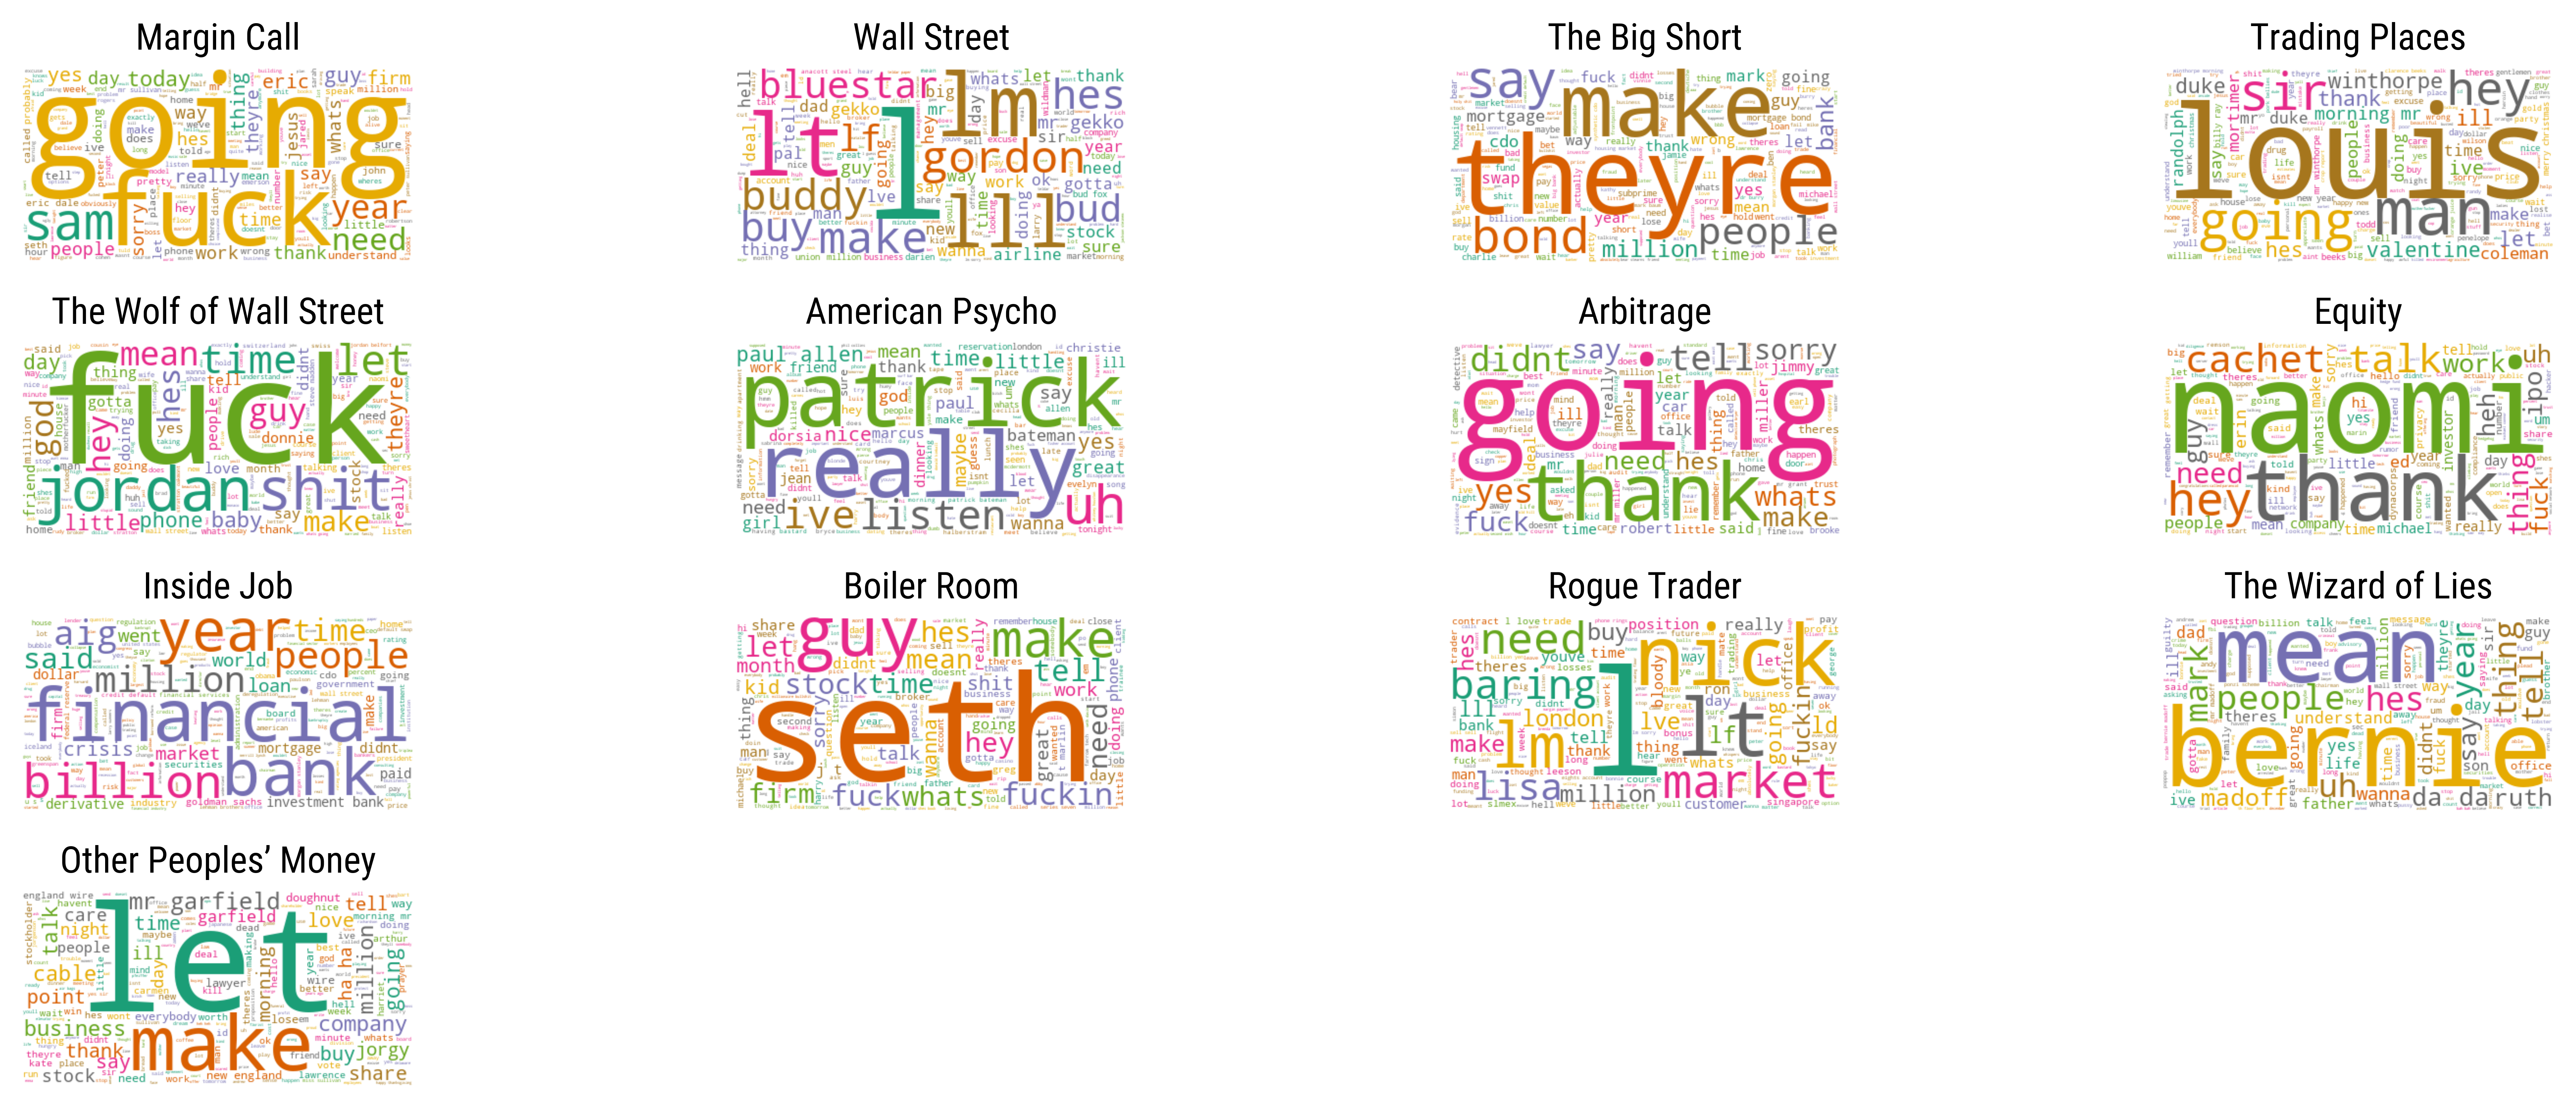

In [22]:
# Import the required font
import matplotlib.font_manager as fm
from matplotlib import rcParams

# Set the font properties
font_path = 'graphfonts/Roboto/RobotoCondensed-Regular.ttf'
prop = fm.FontProperties(fname=font_path, size=12)

# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.subplot.hspace'] = 0.4

full_names = ['Margin Call', 'Wall Street', 'The Big Short', 'Trading Places',
       'The Wolf of Wall Street', 'American Psycho', 'Arbitrage', 'Equity',
       'Inside Job', 'Boiler Room', 'Rogue Trader', 'The Wizard of Lies',
       'Other Peoples’ Money']

# Create subplots for each movie
for index, movie in enumerate(dd.columns):
    wc.generate(data_clean.script[movie])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    
    if index < len(full_names):
        plt.title(full_names[index], fontproperties=prop)
    
plt.show()


# Next stage

In [23]:
# Find the number of unique words that each movie uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for movie in dd.columns:
    uniques = dd[movie].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['movie', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

movie  unique_words
0               Margin Call          1140
7                    Equity          1333
12     Other Peoples’ Money          1462
6                 Arbitrage          1481
3            Trading Places          1508
5           American Psycho          1568
10             Rogue Trader          1705
9               Boiler Room          1746
2             The Big Short          2071
11       The Wizard of Lies          2120
8                Inside Job          2251
1               Wall Street          2342
4   The Wolf of Wall Street          2766

In [24]:
# Calculate the words per minute of each movie

# Find the total number of words that a movie uses
total_list = []
for movie in dd.columns:
    totals = sum(dd[movie])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [107, 126, 130, 118, 180, 104, 107, 100, 108, 120, 101, 133, 103]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

movie  unique_words  total_words  run_times  \
3            Trading Places          1508         4070        118   
0               Margin Call          1140         3720        107   
7                    Equity          1333         3798        100   
5           American Psycho          1568         3974        104   
12     Other Peoples’ Money          1462         4246        103   
6                 Arbitrage          1481         4786        107   
10             Rogue Trader          1705         5006        101   
1               Wall Street          2342         6455        126   
11       The Wizard of Lies          2120         7110        133   
2             The Big Short          2071         7197        130   
9               Boiler Room          1746         6675        120   
8                Inside Job          2251         6269        108   
4   The Wolf of Wall Street          2766        11226        180   

    words_per_minute  
3          34.491525  
0          34.766355  
7          37.980000  
5          38.211538  
12         41.223301  
6          44.728972  
10         49.564356  
1          51.230159  
11         53.458647  
2          55.361538  
9          55.625000  
8          58.046296  
4          62.366667

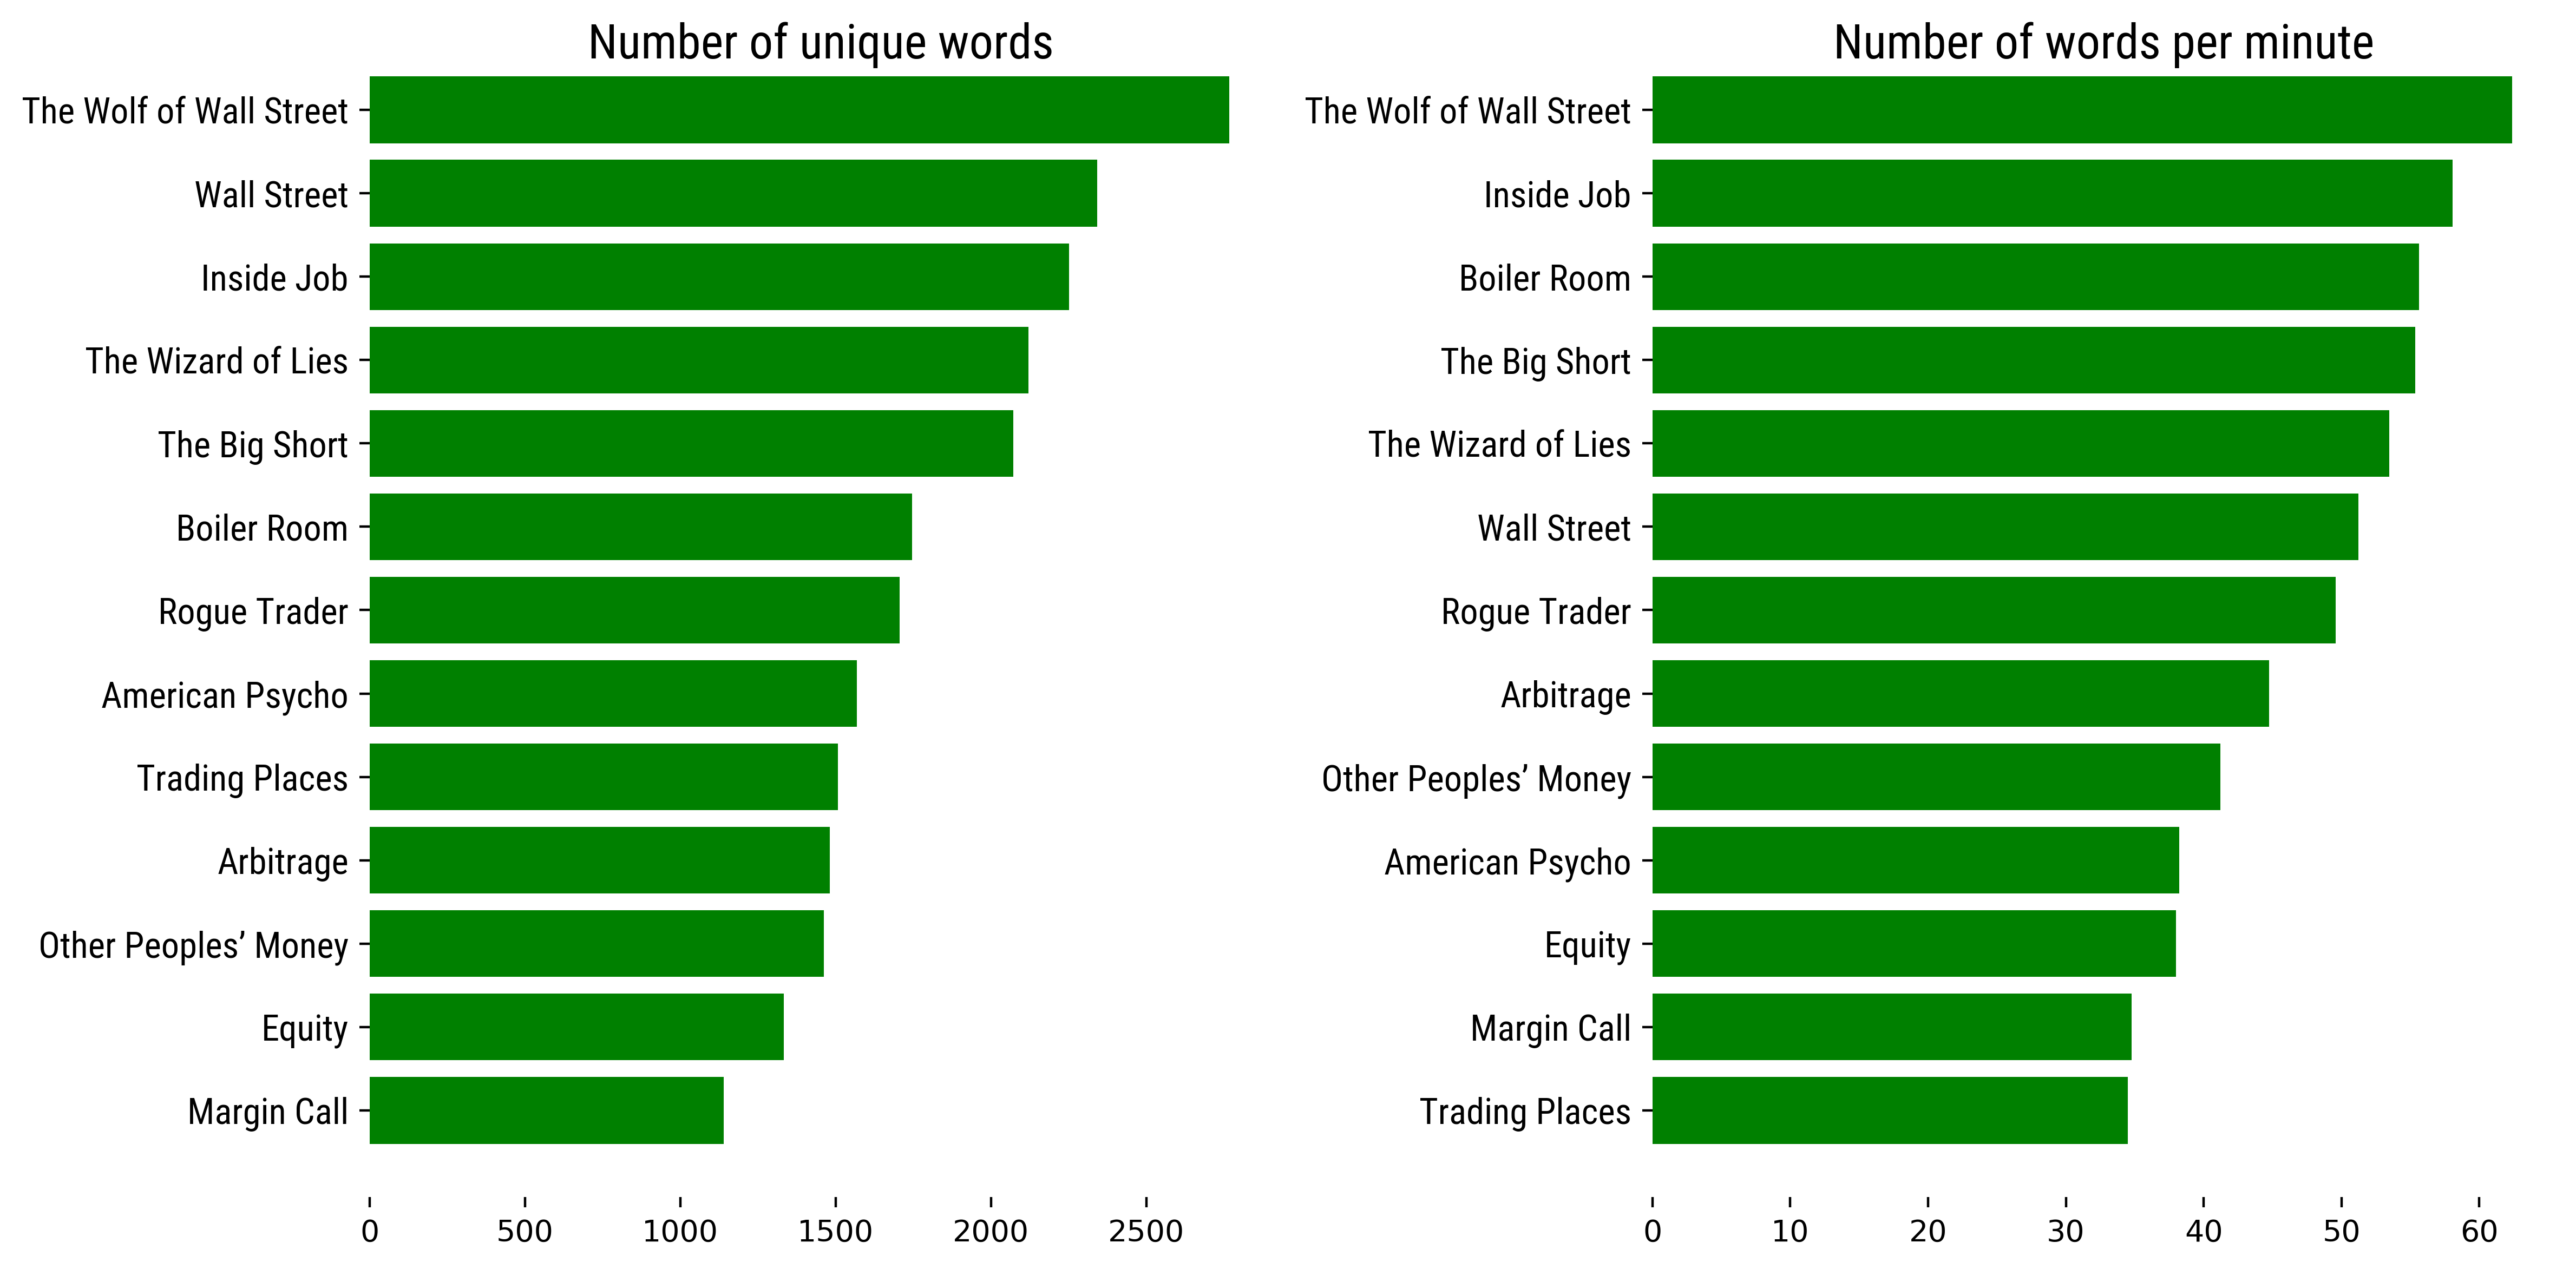

In [25]:
# Import the required libraries and fonts
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

y_pos = np.arange(len(data_words))

# Set the font properties
font_path = font_path
prop = fm.FontProperties(fname=font_path, size=12)

# Set the color for the bars
bar_color = 'green'

# Set the spine color and remove spines
spine_color = 'none'

# Create subplots for each metric
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=400)

# Plot the number of unique words
ax1.barh(y_pos, data_unique_sort.unique_words, align='center', color=bar_color)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(data_unique_sort.movie, fontproperties=prop)
ax1.set_title('Number of unique words', y=.955, fontproperties=prop, fontsize=16)
ax1.spines['right'].set_color(spine_color)
ax1.spines['top'].set_color(spine_color)
ax1.spines['bottom'].set_color(spine_color)
ax1.spines['left'].set_color(spine_color)

# Plot the number of words per minute
ax2.barh(y_pos, data_wpm_sort.words_per_minute, align='center', color=bar_color)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(data_wpm_sort.movie, fontproperties=prop)
ax2.set_title('Number of words per minute', y=.955, fontproperties=prop, fontsize=16)
ax2.spines['right'].set_color(spine_color)
ax2.spines['top'].set_color(spine_color)
ax2.spines['bottom'].set_color(spine_color)
ax2.spines['left'].set_color(spine_color)

# Adjust the layout and display the plot
fig.tight_layout()
plt.show()
# plt.savefig('unique_words_and_wpm.png')

# Profanity

In [26]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('know', 13),
 ('dont', 13),
 ('thats', 13),
 ('right', 12),
 ('just', 12),
 ('think', 12),
 ('like', 12),
 ('yeah', 11),
 ('youre', 11),
 ('want', 11),
 ('good', 11),
 ('im', 10),
 ('come', 10),
 ('got', 10),
 ('money', 10),
 ('okay', 8),
 ('did', 8),
 ('fucking', 7),
 ('look', 7),
 ('gonna', 7),
 ('oh', 7),
 ('hes', 6),
 ('going', 5),
 ('fuck', 5),
 ('mr', 5),
 ('make', 5),
 ('need', 4),
 ('yes', 4),
 ('people', 4),
 ('whats', 4),
 ('million', 4),
 ('hey', 4),
 ('buy', 3),
 ('time', 3),
 ('uh', 3),
 ('tell', 3),
 ('didnt', 3),
 ('really', 2),
 ('guys', 2),
 ('lm', 2),
 ('lts', 2),
 ('lf', 2),
 ('mark', 2),
 ('shit', 2),
 ('morning', 2),
 ('mean', 2),
 ('little', 2),
 ('thank', 2),
 ('talk', 2),
 ('fuckin', 2),
 ('sam', 1),
 ('eric', 1),
 ('today', 1),
 ('gekko', 1),
 ('bud', 1),
 ('lll', 1),
 ('gordon', 1),
 ('buddy', 1),
 ('bluestar', 1),
 ('sure', 1),
 ('theyre', 1),
 ('bonds', 1),
 ('mortgage', 1),
 ('say', 1),
 ('swaps', 1),
 ('winthorpe', 1),
 ('louis', 1),
 ('man', 1),
 ('sir'

In [27]:
# Let's isolate just these bad words
data_bad_words = dd.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

f_word  s_word
Margin Call                  70       7
Wall Street                   4       2
The Big Short                71      36
Trading Places               10       8
The Wolf of Wall Street     500      81
American Psycho              24       3
Arbitrage                    70       2
Equity                       38       7
Inside Job                    0       0
Boiler Room                  73      31
Rogue Trader                 14       7
The Wizard of Lies           92       7
Other Peoples’ Money          4       3

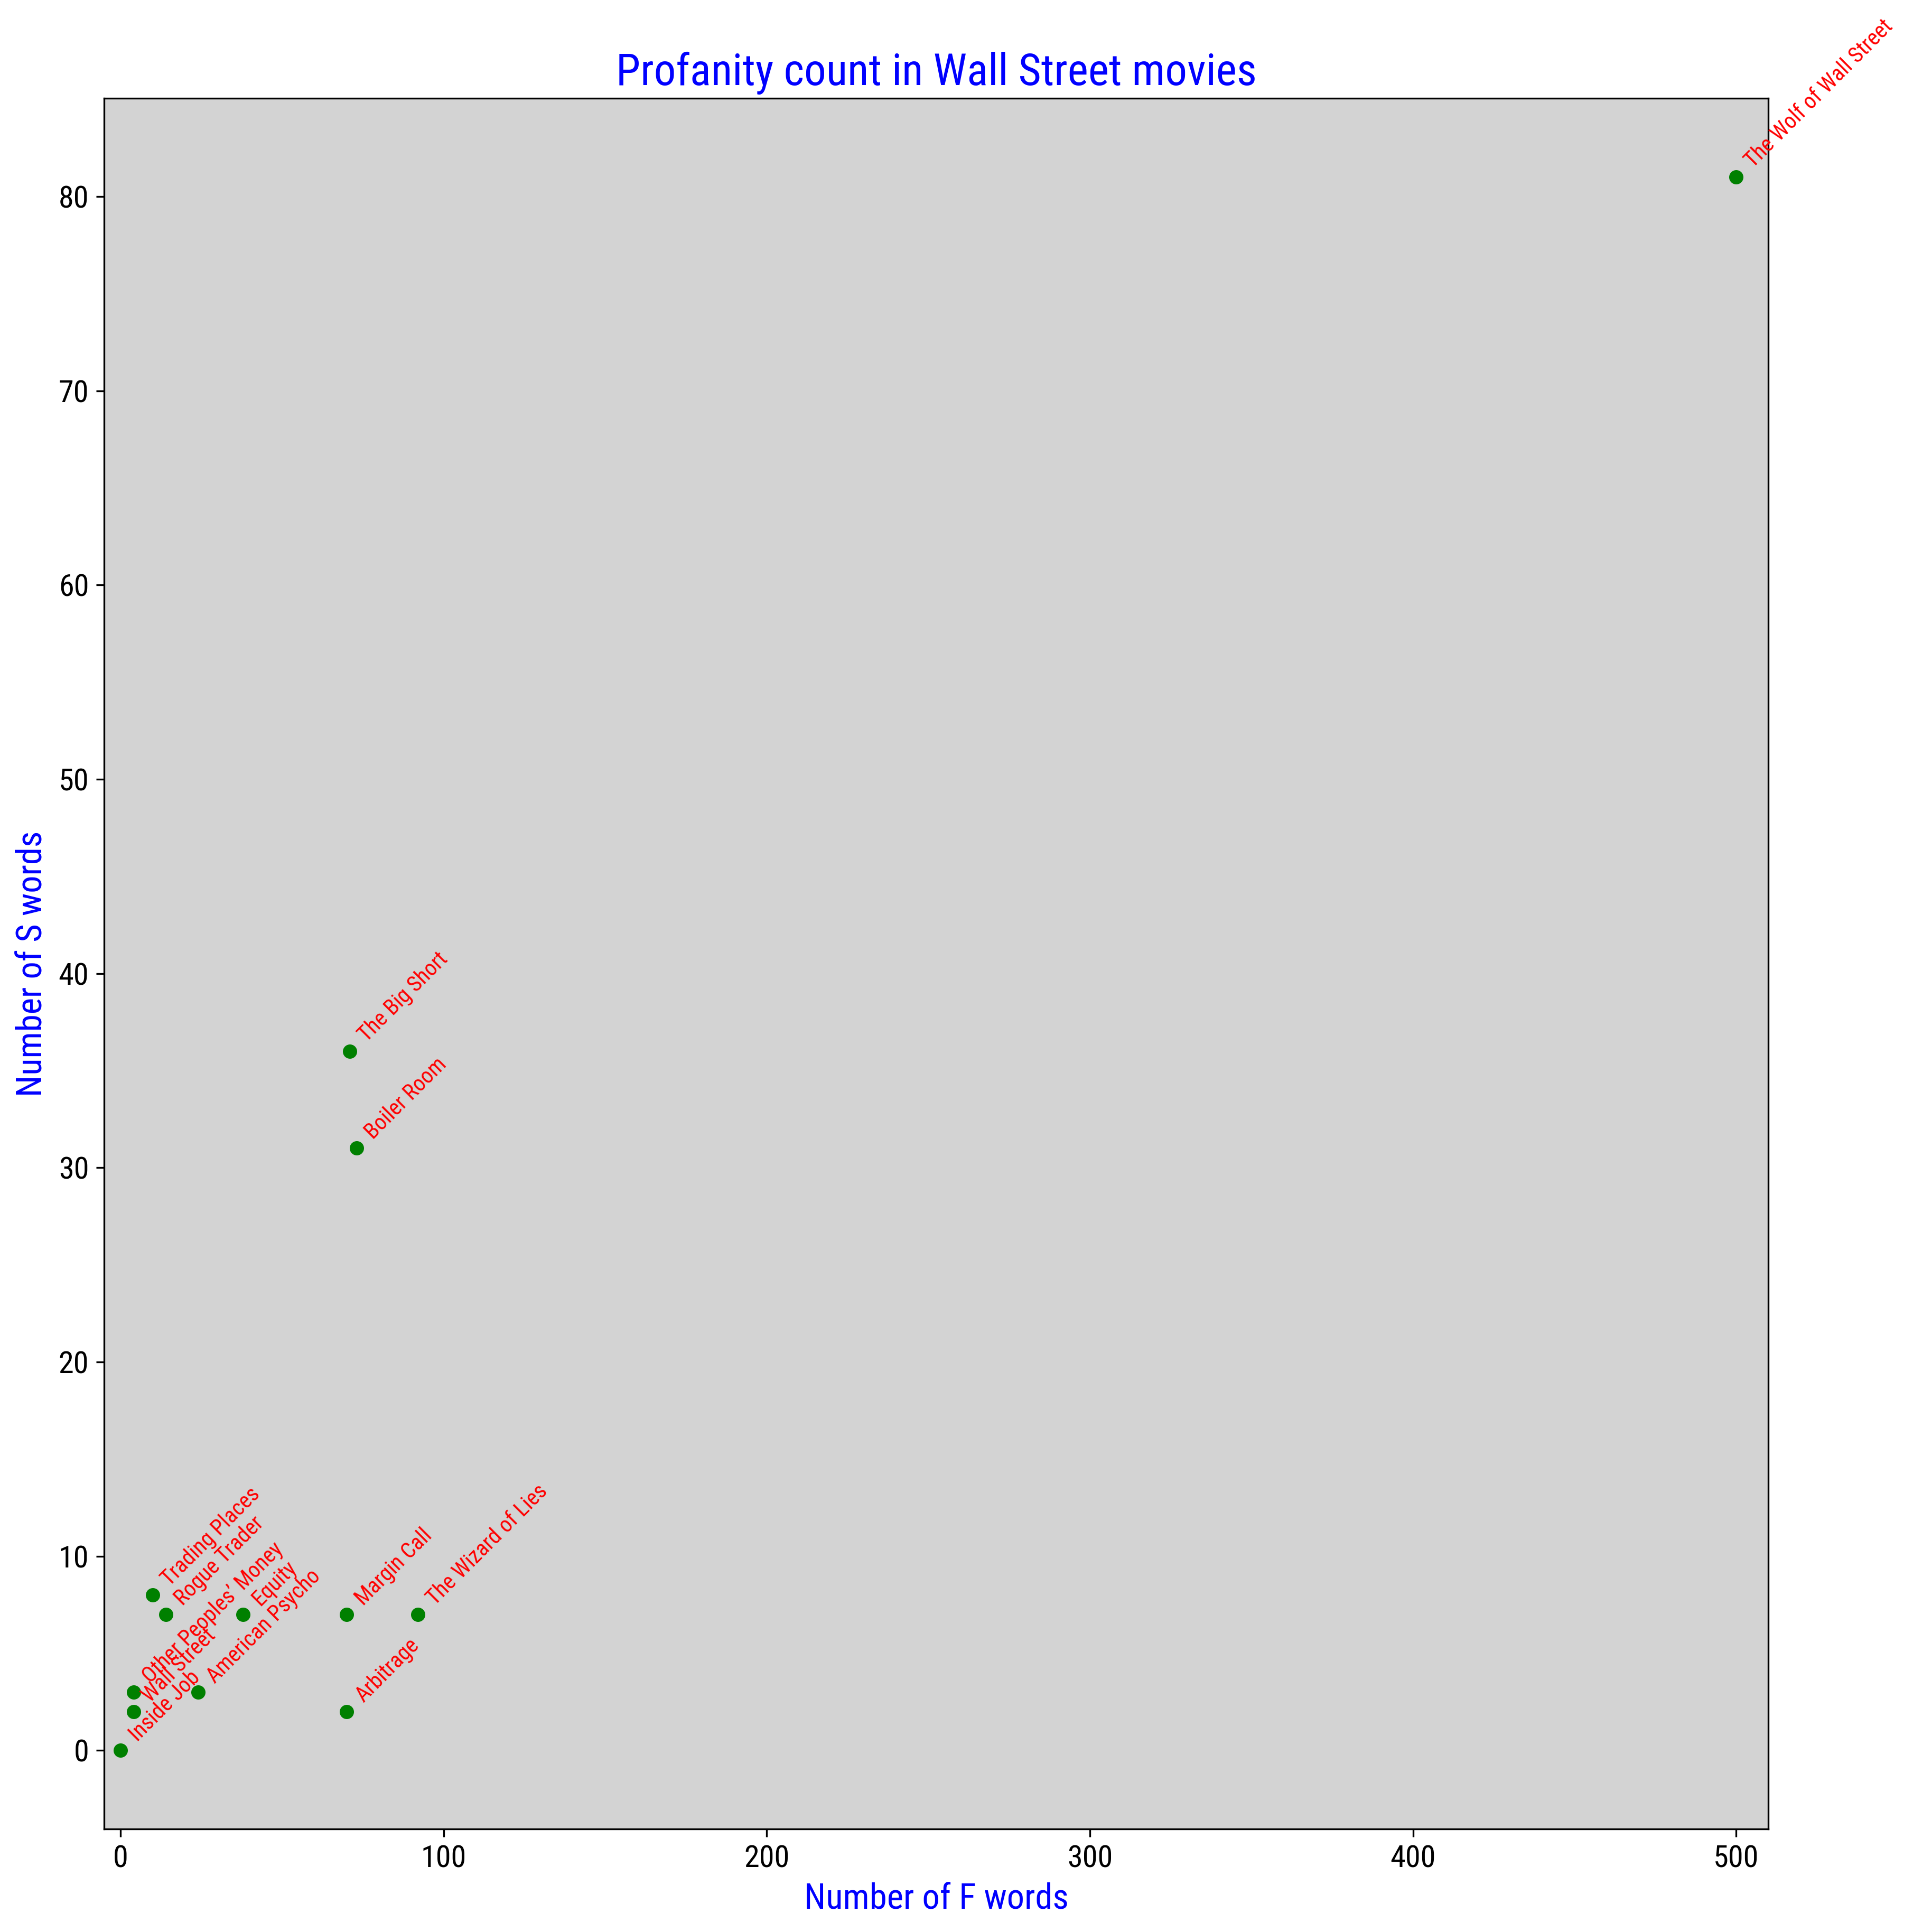

In [28]:
from matplotlib.font_manager import FontProperties

# Define the font properties
font_path = font_path
font_prop = FontProperties(fname=font_path, size=18)

# Set the font properties for titles, ticks, and axis labels
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Set the figure size and DPI
plt.rcParams['figure.figsize'] = [14, 14]
plt.rcParams['figure.dpi'] = 300

# Set the background color to light gray
plt.rcParams['axes.facecolor'] = 'lightgray'

# Plot the scatter dots and text
for i, movie in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[movie]
    y = data_profanity.s_word.loc[movie]
    plt.scatter(x, y, color='green', s=30)
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10, fontproperties=font_prop, color='red', rotation=45)
    plt.xlim(-5, 510) 
    
# Set the title and axis labels
plt.title('Profanity count in Wall Street movies', fontsize=20, fontproperties=font_prop, color='blue')
plt.xlabel('Number of F words', fontsize=16, fontproperties=font_prop, color='blue')
plt.ylabel('Number of S words', fontsize=16, fontproperties=font_prop, color='blue')

# Adjust the margins to prevent overlapping text
plt.subplots_adjust(left=0.15, bottom=0.1)

# Show the plot
plt.show()
# plt.savefig('profanity_count.png')

**Inside Job** has 0 profanity (i.e., no S words or F words). Probably because it's a documentary. While The **Wolf of Wallstreet** puts every movie to shame!

# Sentiment analysis

In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

movie_title = ['Margin Call', 'Wall Street', 'The Big Short', 'Trading Places',
       'The Wolf of Wall Street', 'American Psycho', 'Arbitrage', 'Equity',
       'Inside Job', 'Boiler Room', 'Rogue Trader', 'The Wizard of Lies',
       'Other Peoples’ Money']
data['movie_title'] = movie_title

data['polarity'] = data['script'].apply(pol)
data['subjectivity'] = data['script'].apply(sub)
data

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

for index, movie in enumerate(data.index):
    x = data.polarity.loc[movie]
    y = data.subjectivity.loc[movie]
    plt.scatter(x, y, color='yellow')
    plt.text(x+.001, y+.001, data['movie_title'][index], fontsize=10) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Define the font to be used
font_path = font_path
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'gray'
plt.rcParams['text.color'] = 'white'
plt.rcParams['figure.dpi'] = 300

for index, movie in enumerate(data.index):
    x = data.polarity.loc[movie]
    y = data.subjectivity.loc[movie]
    plt.scatter(x, y, color='red', s=30*4)
    plt.text(x+.001, y-.003, data['movie_title'][index], fontsize=16, fontproperties=font_prop, rotation=5) 
    
plt.title('Sentiment Analysis', fontsize=35, fontproperties=font_prop, color='yellow')
plt.xlabel('<-- Negative -------- Positive -->', fontsize=25, fontproperties=font_prop, color='yellow')
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=25, fontproperties=font_prop, color='yellow')
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

# plt.savefig('sentiment.png')

## Sentiment of movie Over Time

In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.script:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

In [ ]:
# The list has 13 elements, one for each script
len(list_pieces)

In [ ]:
# Each script has been split into 13 pieces of text
len(list_pieces[0])

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['movie_title'].index[0])
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.dpi'] = 600

for index, movie in enumerate(data.index):    
    plt.subplot(4, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['movie_title'][index])
    plt.ylim(bottom=-.2, top=.3)
    plt.tick_params(colors='white', labelsize=12)
    
plt.show()


# Topic modeling
## Attempt #1 (All Text)

In [ ]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data

In [ ]:
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

In [ ]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [ ]:
# Gensim also requires dictionary of all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [ ]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

In [ ]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

In [ ]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.  
## Attempt #2 (Nouns Only)

In [ ]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [ ]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('df_clean.pkl')
data_clean

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.script.apply(nouns))
data_nouns

In [ ]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people', 'yup', 'lm', 'aas'
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said', 'aah', 'aagghh', 'aaa', 'aa']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=list(stop_words))
data_cvn = cvn.fit_transform(data_nouns.script)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names_out())
data_dtmn.index = data_nouns.index
data_dtmn

In [ ]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

In [ ]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

In [ ]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

## Attempt #3 (Nouns and Adjectives)

In [ ]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.script.apply(nouns_adj))
data_nouns_adj

In [ ]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=list(stop_words), max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.script)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names_out())
data_dtmna.index = data_nouns_adj.index
data_dtmna

In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

In [ ]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

In [ ]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

## Identify Topics in Each Document

In [ ]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

In [ ]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))